In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expressions
import os
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import spacy
import pyLDAvis.gensim_models
import en_core_web_md #sm/md/lg size
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import warnings

# Increase width of columns on dataframe
pd.set_option('display.max_colwidth', None)
# Visualise inside a notebook
pyLDAvis.enable_notebook()
# Ignore warnings
warnings.filterwarnings('ignore')

/Users/anna_verbytska/Documents/NLP-with-Disaster-Tweets/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Data exploration


https://www.analyticsvidhya.com/blog/2021/06/eda-exploratory-data-analysis-with-python/
https://www.kaggle.com/code/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way
https://www.analyticsvidhya.com/blog/2021/07/15-python-built-in-functions-which-you-should-know-while-learning-data-science/?utm_source=reading_list&utm_medium=https://www.analyticsvidhya.com/blog/2015/06/infographic-cheat-sheet-data-exploration-python/
https://www.kaggle.com/discussions/getting-started/254970
https://www.kaggle.com/code/datark1/eda-images-processing-and-exploration#1.-Images-metadata

In [3]:
df_train = pd.read_csv('../input/nlp-getting-started/train.csv')
df_train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [5]:
nrow, ncol = df_train.shape
nrow, ncol

(7613, 5)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [12]:
print(df_train.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [15]:
len(df_train['keyword'].unique())

222

In [46]:
df_train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [47]:
df_train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [22]:
len(df_train['location'].unique())

3342

In [23]:
df_train['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [48]:
df_train['text'][32]

'We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw'

In [28]:
len(df_train['text'].unique())

7503

In [39]:
print("The longest tweet has: {} words".format(df_train['text'].apply(lambda x : len(x.split())).max()))

The longest tweet has: 31 words


In [40]:
print("The shortest tweet has: {} words".format(df_train['text'].apply(lambda x : len(x.split())).min()))

The shortest tweet has: 1 words


## Data Preprocessing

In [60]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#Function to remove irrelevant data
def clean_tweet(tweet):

    """
    Regex expressions website https://regex101.com/
    """

    # Capital letters to lowercase
    tweet = tweet.lower()
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove user mentions
    tweet = re.sub(r'@[^\s]+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    # Remove punctuation
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    # Remove #RT
    tweet = re.sub(r'\b(rt)\b','',tweet)
    # Remove words containing numbers
    tweet = re.sub('\w*\d\w*' , '', tweet)
    # Remove single characters
    tweet = re.sub(r'\b[a-zA-Z]\b','',tweet)
    # Remove stopwords
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])

    return tweet

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anna_verbytska/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
df_train['text'] = [clean_tweet(tweet) for tweet in df_train['text']]

In [69]:
#Replacing symbol $ for a letter S in location Mississippi
df_train['location']=df_train['location'].str.replace("$", "S")

## Data Visualisation

In [ ]:
# Check for a data balance
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = ds_cat, x = 'MSZoning', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = ds_cat, x = 'LotShape', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = ds_cat, x = 'LotConfig', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = ds_cat, x = 'MSZoning', y = 'SalePrice' , ax=ax4)
#sns.violinplot(data = ds_cat, x = 'MSZoning', y = 'SalePrice' , ax=ax4)
#sns.swarmplot(data = ds_cat, x = 'MSZoning', y='SalePrice', color = 'k', alpha = 0.4, ax=ax4  )

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = ds_cat, x = 'LotShape', y = 'SalePrice', ax=ax5)
#sns.violinplot(data = ds_cat, x = 'LotShape', y = 'SalePrice', ax=ax5)
#sns.swarmplot(data = ds_cat, x = 'LotShape', y='SalePrice', color = 'k', alpha = 0.4, ax=ax5  )

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = ds_cat, x = 'LotConfig', y = 'SalePrice', ax=ax6)

plt.show()

ValueError: Image size of 1229x69985 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x800 with 1 Axes>

## Feature Engineering

#### Keyword extraction with KeyBERT

https://www.geeksforgeeks.org/keyword-extraction-methods-in-nlp/

In [ ]:
#Installation

!pip install keybert
from keybert import KeyBERT

# Initialize the KeyBERT model
model = KeyBERT('distilbert-base-nli-mean-tokens')

# Example text
text = """
         Transformers provides thousands of pre-trained models to perform tasks on texts such as classification, 
         information extraction, question answering, summarization, translation, text generation, etc. 
         Each architecture is designed with a specific task in mind.
       """

# Extract keywords
keywords = model.extract_keywords(text)

# Print the keywords
print("Keywords:")
for keyword in keywords:
    print(keyword)

#### Extract locations with NER

In [23]:
# Import the spaCy model
nlp = en_core_web_md.load()

In [24]:
# Stopwords set defined
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alfonso/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
stemmer = SnowballStemmer('english')

In [ ]:
# Import training dataset
df_train = pd.read_csv('../input/nlp-getting-started/train.csv')
df_train.head(50)

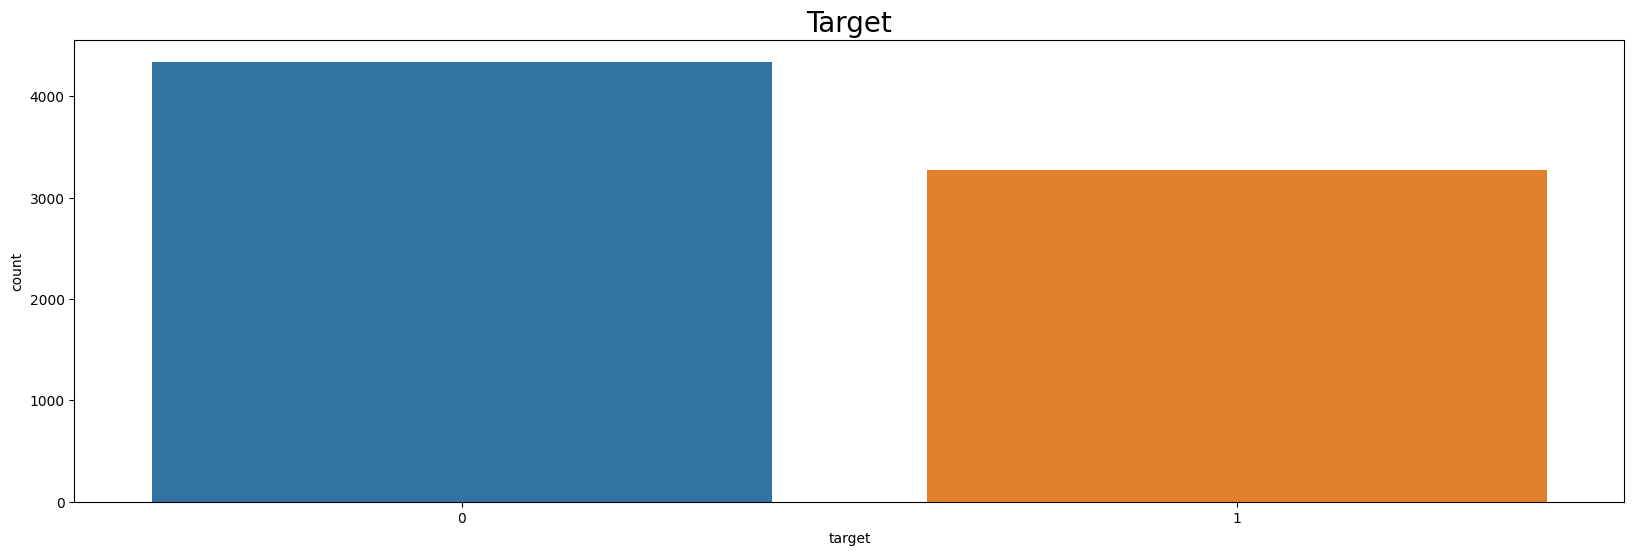

In [28]:
# Check if data is balanced
plt.figure(figsize=(20, 6))
ax = sns.countplot(x=df_train["target"])
ax.set_title("Target", fontsize=20)
plt.show()


In [30]:
# Selection of one tweet
tweet = df_train['text'][32]
print(tweet)

We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw


In [31]:
# Lowercase the tweet
tweet = tweet.lower()
print(tweet)

we always try to bring the heavy. #metal #rt http://t.co/yao1e0xngw


In [32]:
# Remove URLs
tweet = re.sub(r'http\S+', '', tweet)
print(tweet)

we always try to bring the heavy. #metal #rt 


In [33]:
# Remove hashtags
tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
print(tweet)


we always try to bring the heavy. metal rt 


In [34]:
# Remove stopwords
tweet = ' '.join([word for word in tweet.split() if word not in stop_words])
print(tweet)

always try bring heavy. metal rt


In [35]:
# Remove punctuation
tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
print(tweet)

always try bring heavy metal rt


In [36]:
# Stemming
tweet = ' '.join([stemmer.stem(word) for word in tweet.split()])
print(tweet) 

alway tri bring heavi metal rt


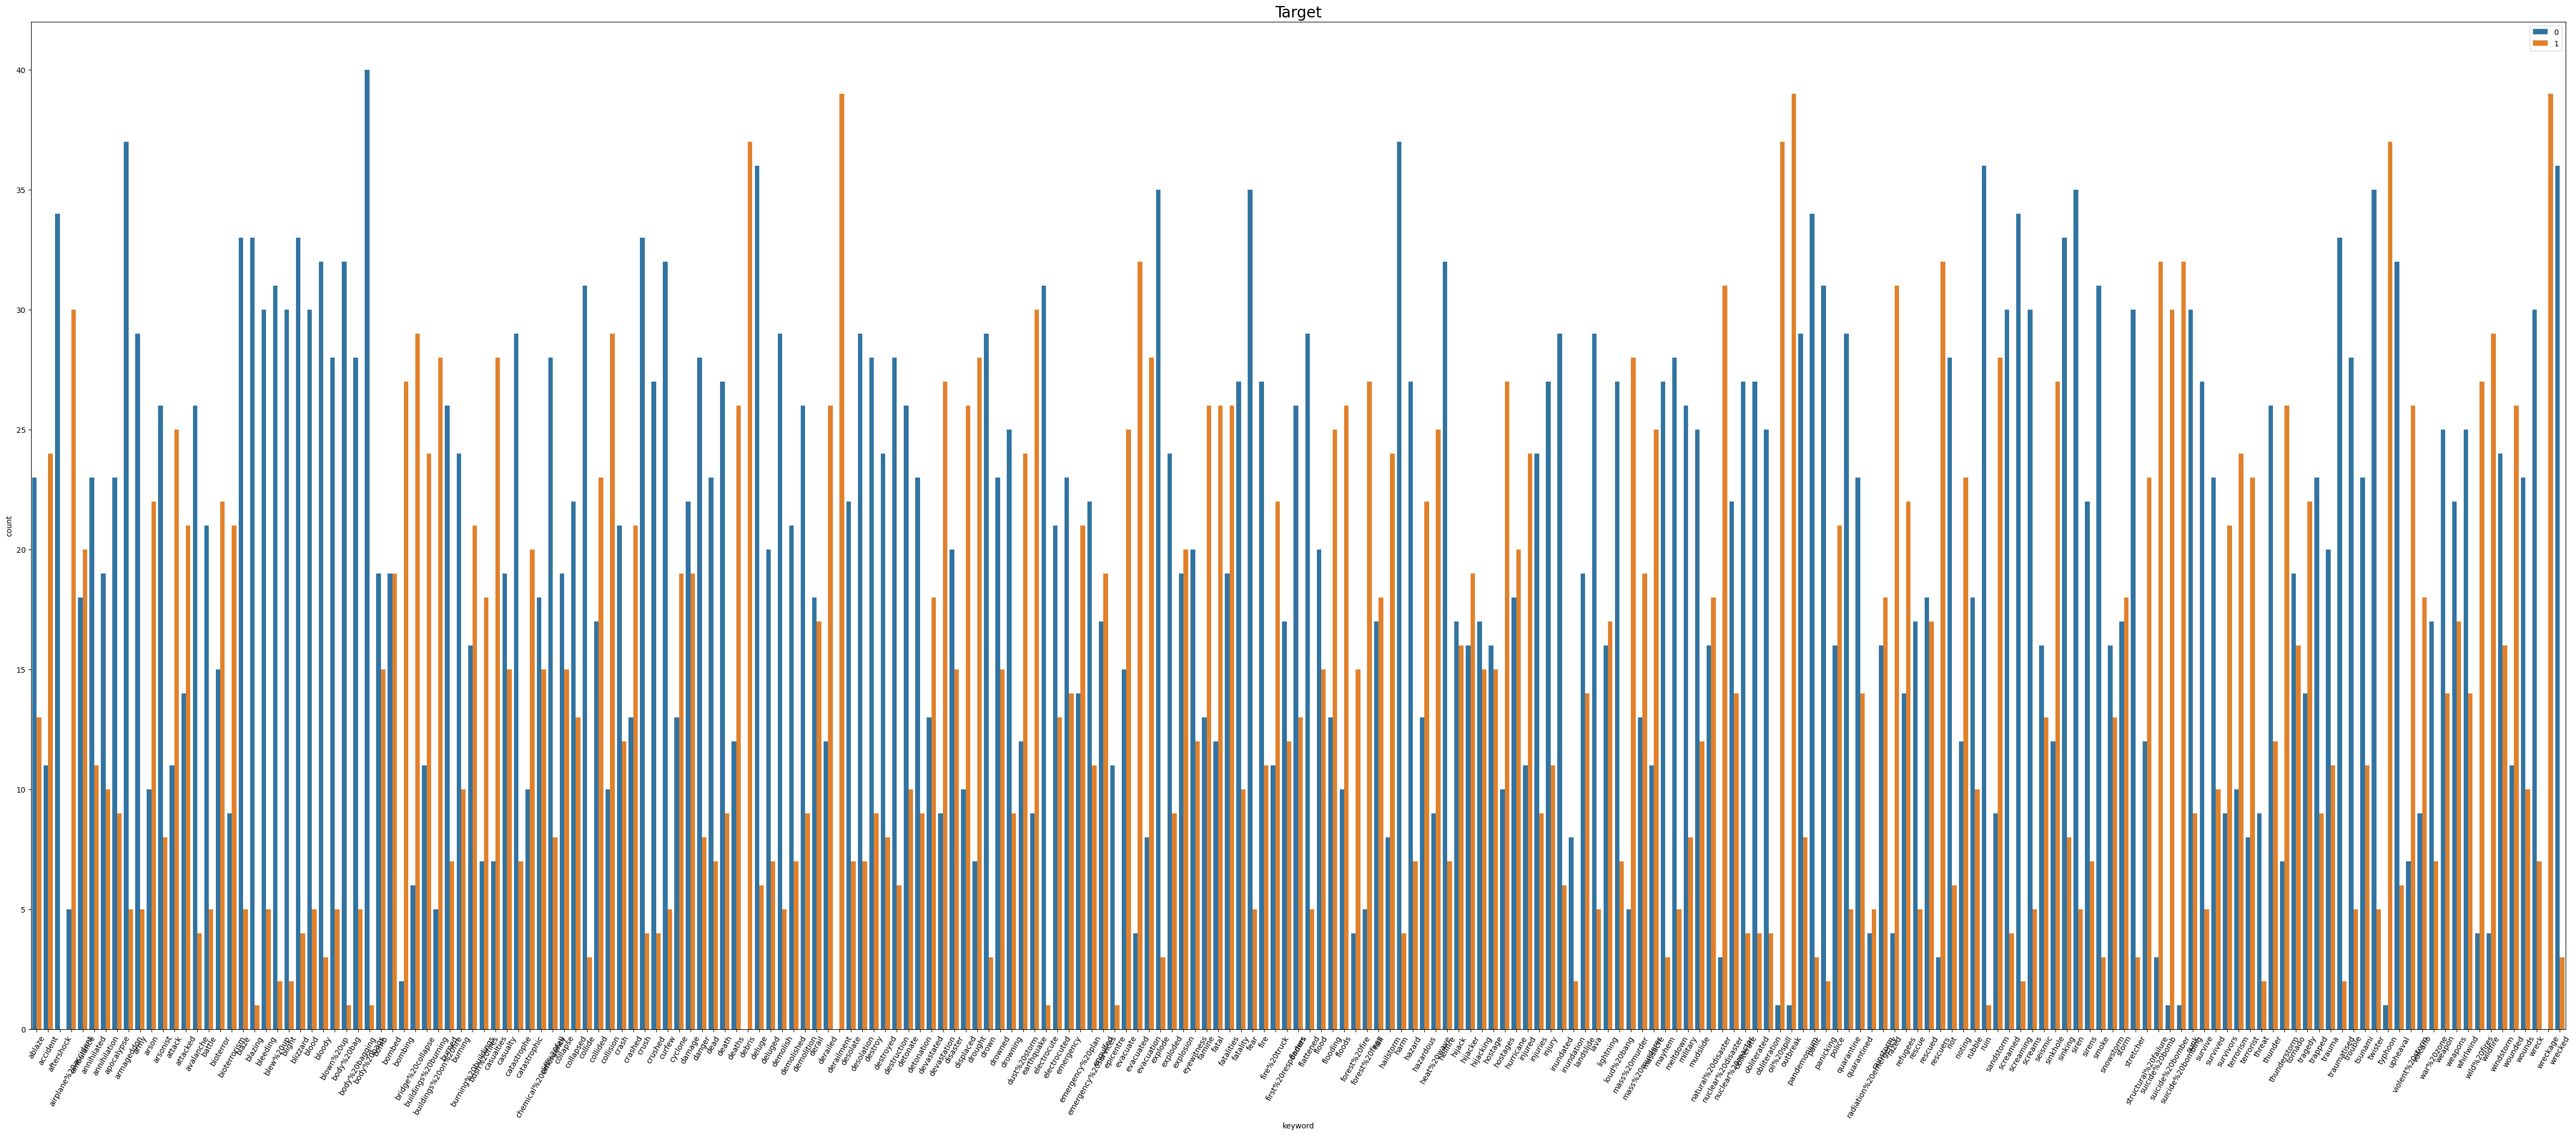

In [37]:
# Countplot depending on keywords
plt.figure(figsize=(60, 24))
ax = sns.countplot(x="keyword",hue="target", data=df_train)
ax.set_title("Target", fontsize=20)
# rotate x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.legend()
plt.show()